说明:
本程序包括了两个方面的计算:
- 复利计算器
- 定投计算器

并且会根据输入参数生成图像

## 需要注意: 第一大块的东西都是定义的函数,需要运行一下加载到内存


In [1]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)

pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)

# 定投计算公式,如果用需要输入参数
def dingtou(a,x,n):
    """定投收益的计算公式为：M=a(1+x)[-1+(1+x)^n]/x;
    其中
    M代表预期收益,
    a代表每期定投金额,
    x代表收益率,
    n代表定投期数。
    假设用户每月定投金额为300元,一年也就是3600元,年收益率为15%,定投期限为35年,则可以计算出收益为3600(1+15%)[-1+(1+15%)^35]/15%=3648044元
    """

    a=float(a)
    x = float(x) / 100
    n = int(n)
    M = a*(1 + x)*(-1 + (1 + x) ** n) / x
    return  round(M,2)

# 定投启动
def show_DT():
    a = input('输入定投金额(元):')
    x = input('输入收益率(如10%则输入10):')
    n = input('输入投资期数')
    # DT_M=dingtou(a,x,n)
    print(f'定投金额:{a},每期收益率:{x},定投期数:{n}')
    pd_col = pd.DataFrame(columns=('期数', '定投金额', '收益率','本期末成本合计', '本期末收益合计','总倍数'))
    for i in range(1,int(n)+1):
        # 定投计算
        DT_M = dingtou(a, x, i)
        # 本金计算
        benjin=round(float(a)*i,2)
        beishu=round((DT_M/benjin),2)
        # 加入数据
        b = pd.Series({'期数': i, '定投金额': a, '收益率': str(x)+'%', '本期末成本合计':benjin,'本期末收益合计': DT_M,'总倍数':beishu})
        pd_col = pd_col.append(b, ignore_index=True)
    fin=pd_col.set_index('期数')
    # 画图
    plt.figure(figsize=(15, 8))
    plt.rcParams['font.family'] = 'Arial Unicode MS'
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams['font.size'] = 12
    font1 = {
        'weight': 'normal',
        'size': 23,
    }

    x = pd_col['期数']
    y1 = pd_col['本期末成本合计']
    y2 = pd_col['本期末收益合计']
    plt.legend(["本期末成本合计", "本期末收益合计"])

    plt.ylabel('金额',size=22)
    plt.xlabel('期数',size=22)
    plt.plot(x, y1, color='blue', linewidth=1.0, linestyle='--')
    plt.plot(x, y2, color='red', linewidth=1.0, linestyle='-.')
    plt.xlim(1, int(n))
    plt.legend(('本金曲线','期末收益合计曲线'),prop=font1)
    # plt.bar (x, y3,color='blue',)
    plt.show()

    print(fin)

# 单利计算器,按期计算
def danli_income(m,n,t):
    """
        m 本金
        n 收益率如5%收益率,则输入5
        t 投资年限 如1年则输入1
        """
    m = float(m)
    n = float(n) / 100
    t = int(t)
    return round(m +m*n*t, 2)




# 复利计算收益 按期计算
def fuli_income(m,n,t):
    """
    m 本金
    n 收益率如5%收益率,则输入5
    t 投资年限 如1年则输入1
    """
    m=float(m)
    n=float(n)/100
    t=int(t)
    return round(m*(1+n)**t,2)

# 单利复利启动
def danli_VS_fuli():
    pd_col = pd.DataFrame(columns=('年限','复利收益','单利收益','差额'))
    m = input("请输入本金(单位元):")
    n = input('请输入收益率(收益率如5%收益率,则输入5):')
    t = input('请输入周期:')
    print(f'\n本金:{m}, 收益率:{n}%, 投资周期{t}\n')
    for i in range(1,int(t)+1):
        fuli = fuli_income(m, n, i)
        danli = danli_income(m, n, i)
        chae = round(fuli - danli, 2)
        # 加入数据
        b = pd.Series({'年限':i,'复利收益':fuli,'单利收益':danli,'差额':chae})
        pd_col = pd_col.append(b,ignore_index=True)
        # 修改索引列
        fin=pd_col.set_index('年限')

    # 画图
    plt.figure(figsize=(15, 8))
    plt.rcParams['font.family'] = 'Arial Unicode MS'
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams['font.size'] = 12

    font1 = {
             'weight': 'normal',
             'size': 23,
             }
    x = pd_col['年限']
    y1 = pd_col['复利收益']
    y2 = pd_col['单利收益']
    y3 = pd_col['差额']
    plt.ylabel('金额',size=22)
    plt.xlabel('期数',size=22)
    plt.plot(x, y1,color='red', linewidth=1.0, linestyle='--')
    plt.plot(x, y2,color='green', linewidth=1.0, linestyle='-.')
    plt.legend(('复利收益曲线', '单利收益曲线'),prop=font1)
    plt.show()

    print(fin)

## 定投计算器
运行后需要按提示输入定投金额, 收益率(年化收益), 投资周期.如果你输入的是月的定投,请自行换算成月的收益率(如年化12%,每月则为1%)

输入定投金额(元):12000
输入收益率(如10%则输入10):8
输入投资期数30
定投金额:12000,每期收益率:8,定投期数:30


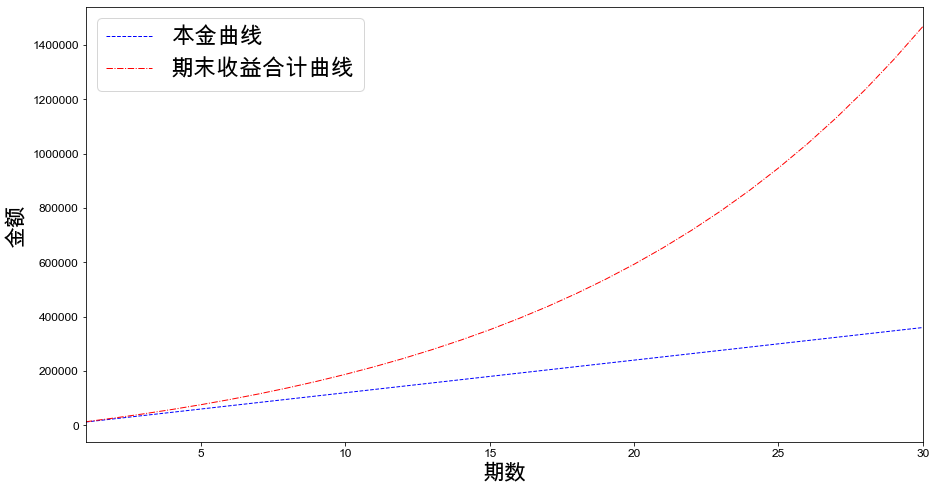

     定投金额 收益率  本期末成本合计  本期末收益合计  总倍数
期数                                                        
1       12000     8%         12000.0        12960.00    1.08
2       12000     8%         24000.0        26956.80    1.12
3       12000     8%         36000.0        42073.34    1.17
4       12000     8%         48000.0        58399.21    1.22
5       12000     8%         60000.0        76031.15    1.27
6       12000     8%         72000.0        95073.64    1.32
7       12000     8%         84000.0       115639.53    1.38
8       12000     8%         96000.0       137850.69    1.44
9       12000     8%        108000.0       161838.75    1.50
10      12000     8%        120000.0       187745.85    1.56
11      12000     8%        132000.0       215725.52    1.63
12      12000     8%        144000.0       245943.56    1.71
13      12000     8%        156000.0       278579.04    1.79
14      12000     8%        168000.0       313825.37    1.87
15      12000     8%        180000.0       351891.

In [2]:
# 点  ctrl+回车  运行
show_DT()

## 复利计算器
运行后需要按提示输入本金金额, 收益率(年化收益), 投资周期(年的).如果你输入的是月的复利,请自行换算成月的收益率(如年化12%,每月则为1%),并将投资周期按月算次数


请输入本金(单位元):360000
请输入收益率(收益率如5%收益率,则输入5):8
请输入周期:30

本金:360000, 收益率:8%, 投资周期30



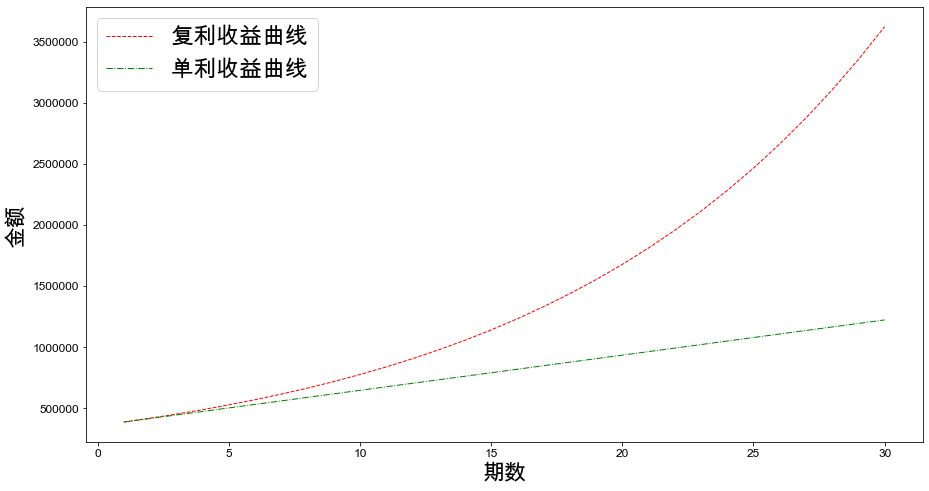

        复利收益   单利收益        差额
年限                                   
1.0    388800.00   388800.0        0.00
2.0    419904.00   417600.0     2304.00
3.0    453496.32   446400.0     7096.32
4.0    489776.03   475200.0    14576.03
5.0    528958.11   504000.0    24958.11
6.0    571274.76   532800.0    38474.76
7.0    616976.74   561600.0    55376.74
8.0    666334.88   590400.0    75934.88
9.0    719641.67   619200.0   100441.67
10.0   777213.00   648000.0   129213.00
11.0   839390.04   676800.0   162590.04
12.0   906541.24   705600.0   200941.24
13.0   979064.54   734400.0   244664.54
14.0  1057389.70   763200.0   294189.70
15.0  1141980.88   792000.0   349980.88
16.0  1233339.35   820800.0   412539.35
17.0  1332006.50   849600.0   482406.50
18.0  1438567.02   878400.0   560167.02
19.0  1553652.38   907200.0   646452.38
20.0  1677944.57   936000.0   741944.57
21.0  1812180.14   964800.0   847380.14
22.0  1957154.55   993600.0   963554.55
23.0  2113726.91  1022400.0  1091326.91
24.0  228282

In [3]:
# 点  ctrl+回车  运行
danli_VS_fuli()

**玩的愉快**